In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
import statsmodels.api as sm 

client_profiles = pd.read_csv(r"C:\Users\leube\Ironhack\Bootcamp\week_5\GPW5&6\vanguard-ab-test\data\raw\df_final_demo.txt")

client_profiles

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [2]:
client_profiles_updated = client_profiles.dropna()
client_profiles_updated

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
client_profiles_updated['num_accts'].unique()

array([2., 5., 3., 4., 6., 7., 1., 8.])

In [4]:
client_profiles_updated['gendr'].unique()

array(['U', 'M', 'F', 'X'], dtype=object)

In [5]:
experiment_roster = pd.read_csv(r"C:\Users\leube\Ironhack\Bootcamp\week_5\GPW5&6\vanguard-ab-test\data\raw\df_final_experiment_clients.txt")
experiment_roster

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [6]:
df3_1 = pd.read_csv(r"C:\Users\leube\Ironhack\Bootcamp\week_5\GPW5&6\vanguard-ab-test\data\raw\df_final_web_data_pt_1.txt")
df3_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [7]:
df3_2 = pd.read_csv(r"C:\Users\leube\Ironhack\Bootcamp\week_5\GPW5&6\vanguard-ab-test\data\raw\df_final_web_data_pt_2.txt")
df3_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [8]:
digital_footprints_combined = pd.concat([df3_1, df3_2])
digital_footprints_combined.reset_index(drop=True, inplace=True)
digital_footprints_combined

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [9]:
digital_footprints_combined['process_step'].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [10]:
digital_footprints_combined.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [11]:
experiment_roster.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [12]:
client_profiles.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [13]:
rows_with_nulls = client_profiles[client_profiles.isnull().any(axis=1)]
rows_with_nulls

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
experiment_roster_cleaned = experiment_roster.dropna()
experiment_roster_cleaned
#dropped NaN values because they arent part of the experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


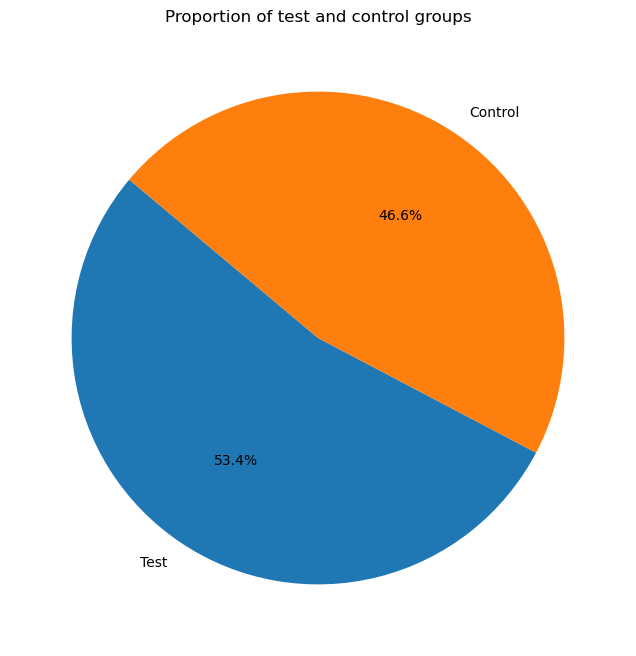

In [15]:
experiment_groups = experiment_roster_cleaned['Variation'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(experiment_groups, labels=experiment_groups.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of test and control groups')
plt.show()

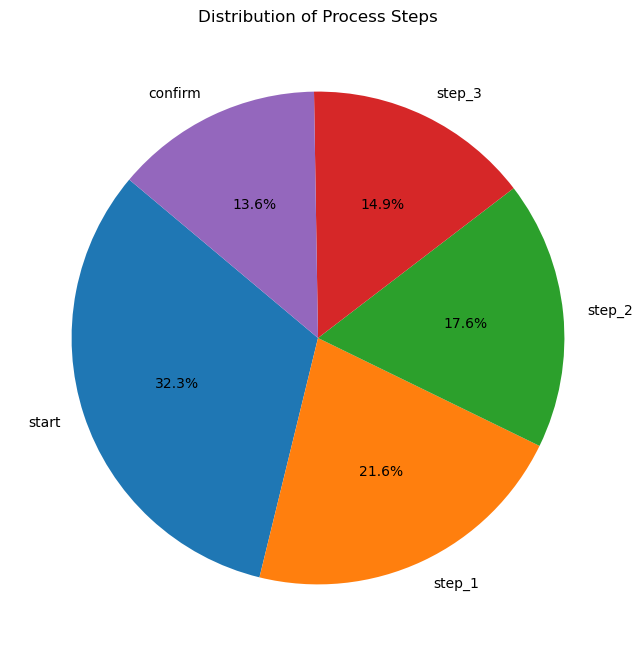

In [16]:
process_step_counts = digital_footprints_combined['process_step'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(process_step_counts, labels=process_step_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Process Steps')
plt.show()

In [17]:
client_profiles_updated['gendr'] = client_profiles_updated['gendr'].replace('X', 'U')

C:\Users\leube\AppData\Local\Temp\ipykernel_18720\2934923356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_profiles_updated['gendr'] = client_profiles_updated['gendr'].replace('X', 'U')


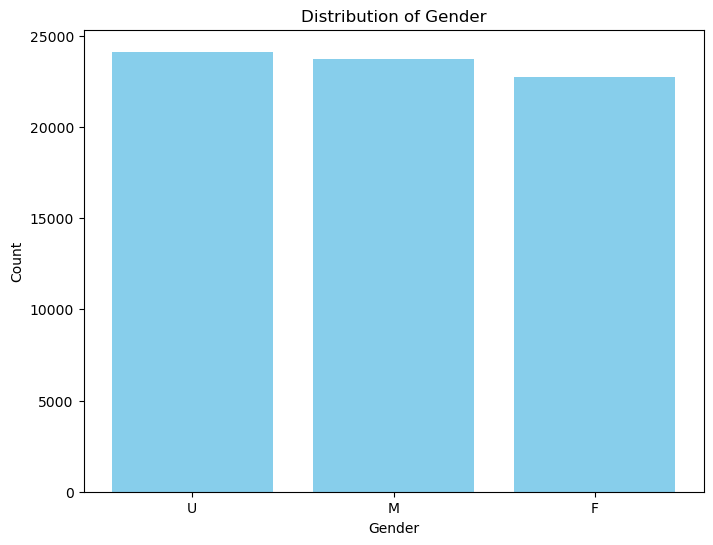

In [18]:
category_counts = client_profiles_updated['gendr'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

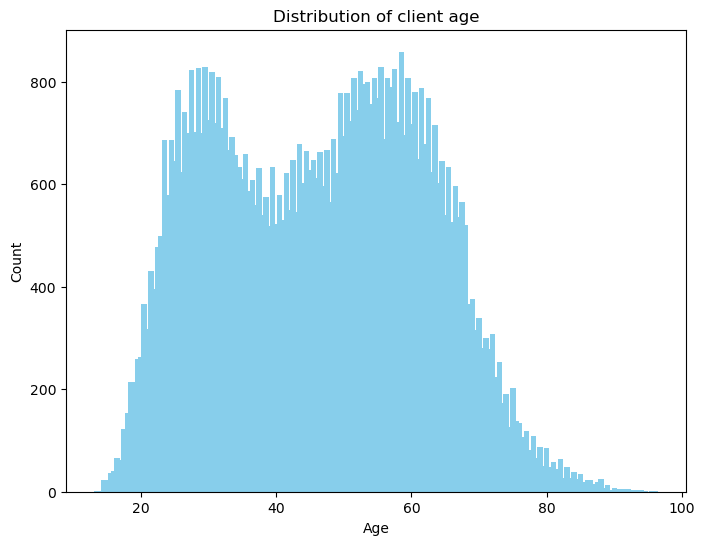

In [19]:
client_ages = client_profiles_updated['clnt_age'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(client_ages.index, client_ages.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of client age')
plt.show()

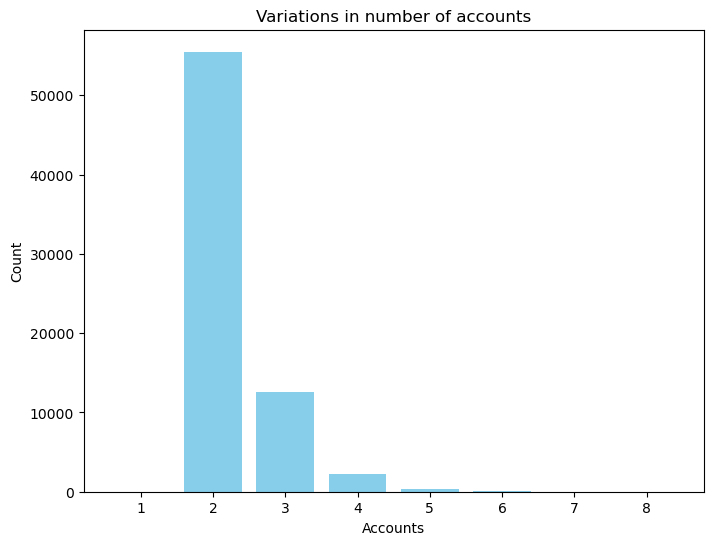

In [20]:
num_acc = client_profiles_updated['num_accts'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(num_acc.index, num_acc.values, color='skyblue')
plt.xlabel('Accounts')
plt.ylabel('Count')
plt.title('Variations in number of accounts')
plt.show()

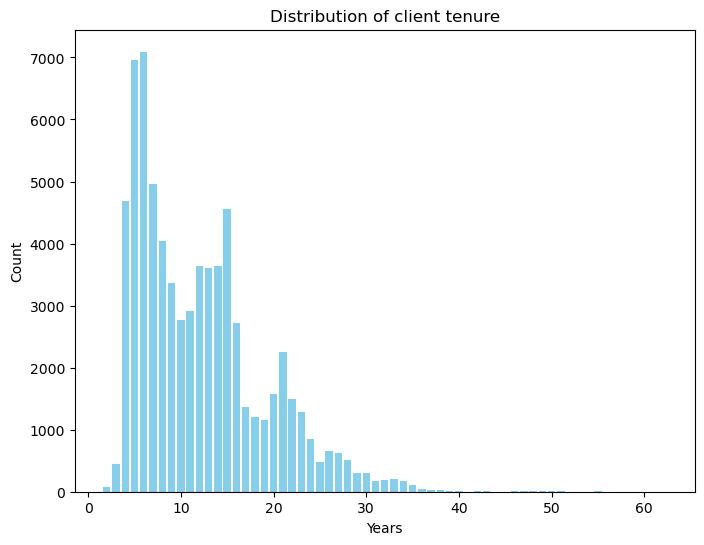

In [21]:
client_history = client_profiles_updated['clnt_tenure_yr'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(client_history.index, client_history.values, color='skyblue')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Distribution of client tenure')
plt.show()

In [22]:

test_group = digital_footprints_combined[digital_footprints_combined['client_id'].isin(
    experiment_roster_cleaned[experiment_roster_cleaned['Variation'] == 'Test']['client_id'].values
)]


control_group = digital_footprints_combined[digital_footprints_combined['client_id'].isin(
    experiment_roster_cleaned[experiment_roster_cleaned['Variation'] == 'Control']['client_id'].values
)]

In [23]:
test_group_counts = test_group['process_step'].value_counts()
control_group_counts = control_group['process_step'].value_counts()

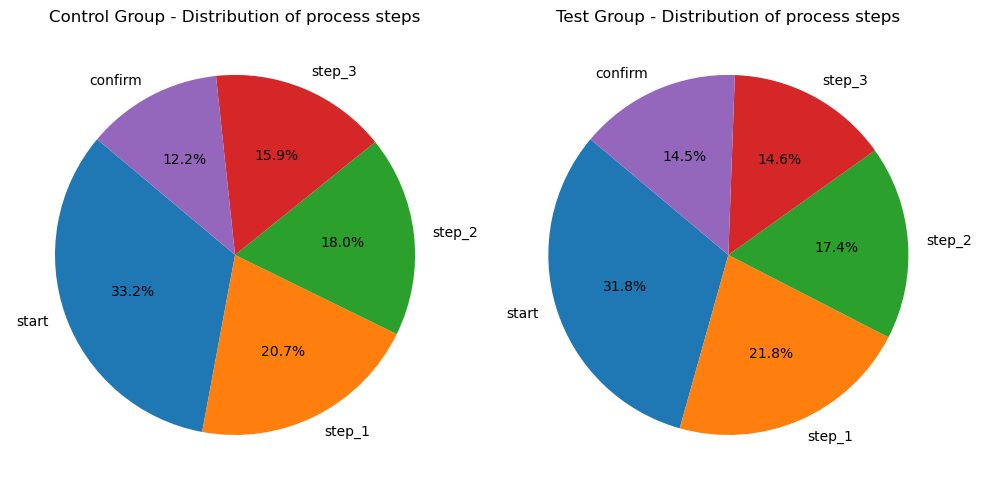

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(control_group_counts, labels=control_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Control Group - Distribution of process steps')
plt.subplot(1, 2, 2)
plt.pie(test_group_counts, labels=test_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Test Group - Distribution of process steps')
plt.tight_layout()
plt.show()

In [25]:
digital_footprints_combined['date_time'] = pd.to_datetime(digital_footprints_combined['date_time'])

digital_footprints_combined = digital_footprints_combined.sort_values(by=['client_id', 'date_time'])

digital_footprints_combined['timespent'] = digital_footprints_combined.groupby('client_id')['date_time'].diff()

digital_footprints_combined = digital_footprints_combined.dropna(subset=['timespent'])

In [26]:
digital_footprints_combined = pd.merge(digital_footprints_combined, experiment_roster_cleaned[['client_id', 'Variation']], on='client_id')

average_time_spent  = digital_footprints_combined.groupby(['Variation', 'process_step'])['timespent'].mean().reset_index()

average_time_spent['timespent'] = average_time_spent['timespent'].dt.total_seconds()

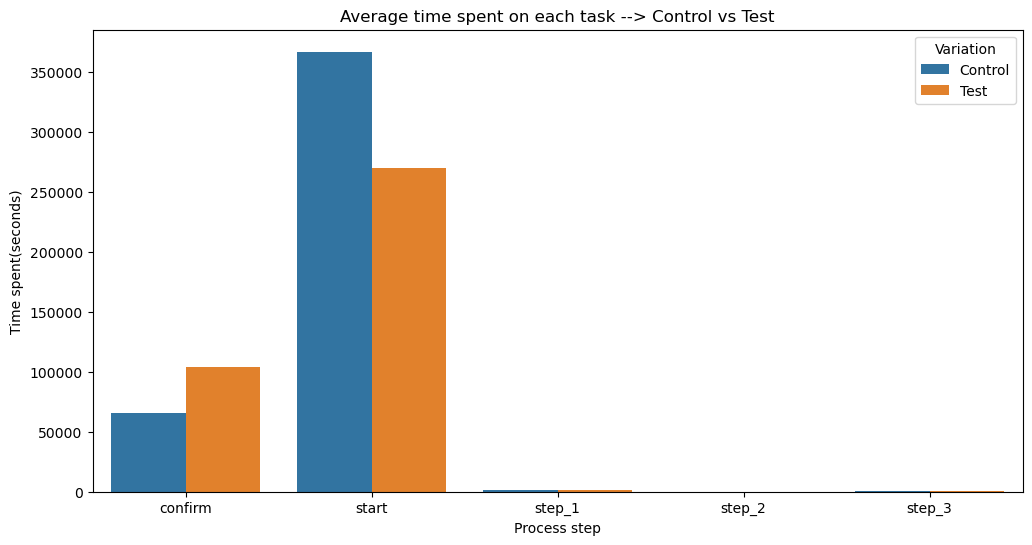

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='timespent', hue='Variation', data=average_time_spent)
plt.title('Average time spent on each task --> Control vs Test')
plt.xlabel('Process step')
plt.ylabel('Time spent(seconds)')
plt.show()

In [28]:
#hypothesis testing
alpha = 0.5

In [29]:
test_group

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
637483,1574008,117364417_77840596075,528720790_71583064618_169151,confirm,2017-05-06 23:51:05
637484,1574008,117364417_77840596075,528720790_71583064618_169151,step_3,2017-05-06 23:50:40
637485,1574008,117364417_77840596075,528720790_71583064618_169151,step_2,2017-05-06 23:43:47
637486,1574008,117364417_77840596075,528720790_71583064618_169151,step_1,2017-05-06 23:43:34


In [30]:
control_group

,client_id,visitor_id,visit_id,process_step,date_time
13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03
14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01
15,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52
16,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08
17,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43
...,...,...,...,...,...
637471,433098,5505424_50616523266,773565250_67577573147_389841,start,2017-05-13 15:30:47
637532,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17
637533,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31
637534,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23


In [31]:
n1 = len(test_group)
n1

177847

In [32]:
n2 = len(control_group)
n2

143462

In [33]:
x2 = len(control_group[control_group['process_step'] == 'confirm'])
x2

17505

In [34]:
x1 = len(test_group[test_group['process_step'] == 'confirm'])
x1

25722

In [35]:
test_group

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
637483,1574008,117364417_77840596075,528720790_71583064618_169151,confirm,2017-05-06 23:51:05
637484,1574008,117364417_77840596075,528720790_71583064618_169151,step_3,2017-05-06 23:50:40
637485,1574008,117364417_77840596075,528720790_71583064618_169151,step_2,2017-05-06 23:43:47
637486,1574008,117364417_77840596075,528720790_71583064618_169151,step_1,2017-05-06 23:43:34


In [54]:
from scipy.stats import shapiro

# Getting the client ids of each group
test_group_client_ids = experiment_roster_cleaned[experiment_roster_cleaned['Variation']=="Test"]['client_id'].values
control_group_client_ids = experiment_roster_cleaned[experiment_roster_cleaned['Variation']=='Control']['client_id'].values

# Extract the ages
test_group_client_ages = client_profiles_updated[client_profiles_updated['client_id'].isin(test_group_client_ids)]['clnt_age'].values
control_group_client_ages = client_profiles_updated[client_profiles_updated['client_id'].isin(control_group_client_ids)]['clnt_age'].values

# Normality test for both groups
test_stat, test_p_value = shapiro(test_group_client_ages)
control_stat, control_p_value = shapiro(control_group_client_ages)

print(f"Test group normality p-value: {test_p_value}")
print(f"Control group normality p-value: {control_p_value}")



Test group normality p-value: 0.0
Control group normality p-value: 0.0


C:\Users\leube\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [73]:
test_group_size = len(test_group_client_ids)
control_group_size = len(control_group_client_ids)

In [74]:
test_group_completed = len(np.unique(test_group[test_group['process_step']=='confirm']['client_id'].values))
control_group_completed = len(np.unique(control_group[control_group['process_step']=='confirm']['client_id'].values))

In [75]:
count = np.array([test_group_completed, control_group_completed])
nobs = np.array([test_group_size, control_group_size])

# H0: test_completion_rate = control_completion_rate
# H1: test_completion_rate != control_completion_rate

_, p_value = sm.stats.proportions_ztest(count, nobs, alternative='two-sided')
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')

Reject the null hypothesis


In [75]:
count = np.array([test_group_completed, control_group_completed])
nobs = np.array([test_group_size, control_group_size])

# H0: test_completion_rate >= control_completion_rate
# H1: test_completion_rate < control_completion_rate

_, p_value = sm.stats.proportions_ztest(count, nobs, alternative='two-sided')
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')

Reject the null hypothesis


In [76]:
threshold = 0.05
_, p_value = sm.stats.proportions_ztest(count, nobs, value=threshold, alternative='larger')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

P-value: 0.999028517875349
We fail to reject the null hypothesis


In [77]:
test_group

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
637483,1574008,117364417_77840596075,528720790_71583064618_169151,confirm,2017-05-06 23:51:05
637484,1574008,117364417_77840596075,528720790_71583064618_169151,step_3,2017-05-06 23:50:40
637485,1574008,117364417_77840596075,528720790_71583064618_169151,step_2,2017-05-06 23:43:47
637486,1574008,117364417_77840596075,528720790_71583064618_169151,step_1,2017-05-06 23:43:34


In [78]:
test_group.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [79]:
test_group['date_time'] = pd.to_datetime(test_group['date_time'])

# Identify the start and end time for each visit_id
start_times = test_group[test_group['process_step'] == 'start'].groupby('visit_id')['date_time'].min()
end_times = test_group[test_group['process_step'] == 'confirm'].groupby('visit_id')['date_time'].max()

# Calculate the completion time for each visit_id
completion_times = (end_times - start_times).dt.total_seconds()

# Calculate the average completion time
average_completion_time = completion_times.mean()

# Display the result in a more readable format, e.g., in minutes
average_completion_time_minutes = average_completion_time / 60

average_completion_time_minutes

C:\Users\leube\AppData\Local\Temp\ipykernel_18720\2985156040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_group['date_time'] = pd.to_datetime(test_group['date_time'])


6.926766999869697

In [80]:
control_group['date_time'] = pd.to_datetime(control_group['date_time'])

# Identify the start and end time for each visit_id
start_times = control_group[control_group['process_step'] == 'start'].groupby('visit_id')['date_time'].min()
end_times = control_group[control_group['process_step'] == 'confirm'].groupby('visit_id')['date_time'].max()

# Calculate the completion time for each visit_id
completion_times = (end_times - start_times).dt.total_seconds()

# Calculate the average completion time
average_completion_time = completion_times.mean()

# Display the result in a more readable format, e.g., in minutes
average_completion_time_minutes = average_completion_time / 60

average_completion_time_minutes

C:\Users\leube\AppData\Local\Temp\ipykernel_18720\3385911486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group['date_time'] = pd.to_datetime(control_group['date_time'])


6.701939337001745

In [81]:
client_profiles_updated['gendr'].unique()

array(['U', 'M', 'F'], dtype=object)

In [ ]:
client_profiles_updated.to_csv('client_profiles_uopdated.csv', index=False)

In [ ]:
digital_footprints_combined.to_csv('digital_foorprints_combined.csv', index=False)

In [ ]:
experiment_roster_cleaned.to_csv('experiment_roster_cleaned.csv', index=False)

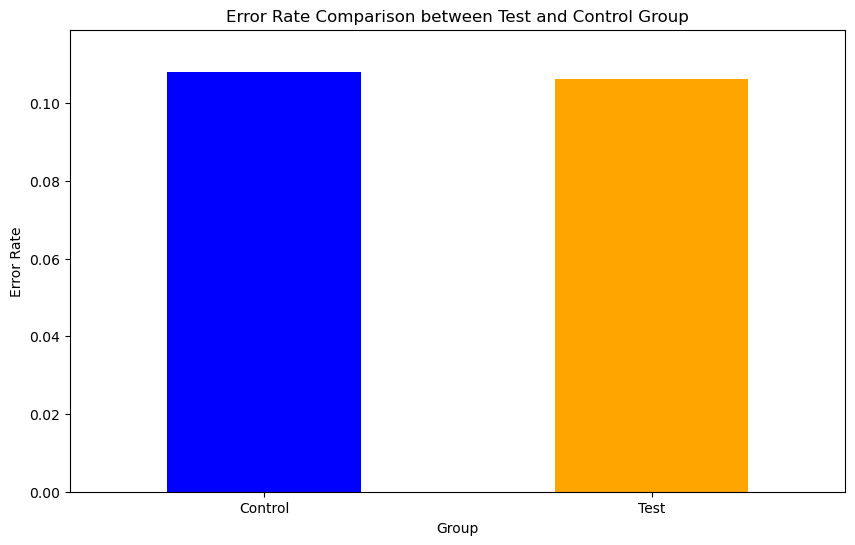

In [82]:

digital_footprints_combined['previous_step'] = digital_footprints_combined.groupby(['visitor_id', 'visit_id'])['process_step'].shift(1)
digital_footprints_combined['error'] = digital_footprints_combined['process_step'] == digital_footprints_combined['previous_step']

error_rate = digital_footprints_combined.groupby('Variation')['error'].mean()

plt.figure(figsize=(10, 6))
error_rate.plot(kind='bar', color=['blue', 'orange'])
plt.title('Error Rate Comparison between Test and Control Group')
plt.xlabel('Group')
plt.ylabel('Error Rate')
plt.xticks(rotation=0)
plt.ylim(0, error_rate.max() * 1.1)
plt.show()

In [83]:
digital_footprints_combined.head()

,client_id,visitor_id,visit_id,process_step,date_time,timespent,Variation,previous_step,error
0,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,0 days 00:00:07,Test,NaN,False
1,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,0 days 00:00:32,Test,step_1,False
2,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,0 days 00:01:39,Test,step_2,False
3,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,0 days 00:00:20,Test,step_3,False
4,647,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,0 days 00:00:07,Test,NaN,False
